<a href="https://colab.research.google.com/github/mscandlen3/CS4650/blob/main/LanguageLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Analysis of Language Learning

*Madelyn Scandlen and Shivali Pandya*

This project seeks to perform text classification tasks on a Reddit data corpus and an Spanish learner essay corpus in order to see which language learners are the most successful.

There are two main features of the project. 

The first task is to perform supervised classification of Spanish learners into different levels of proficiency. 

The second task is to classify Spanish learners into motivation profiles and evaluate the relationship between the learners' motivation and their proficiency over time.

## Set Up

### Importing Data from Google Cloud

This step is loading the JSON data from its location in Google Cloud Storage into this Colab notebook.

In [4]:
!gsutil cp gs://language_learning_subreddit/2019_SUBREDDITS=learnspanish,spanish.gz gs://language_learning_subreddit/famous.F17.csv gs://language_learning_subreddit/reddit_tagged.csv .

Copying gs://language_learning_subreddit/2019_SUBREDDITS=learnspanish,spanish.gz...
Copying gs://language_learning_subreddit/famous.F17.csv...
Copying gs://language_learning_subreddit/reddit_tagged.csv...
/ [3 files][ 15.0 MiB/ 15.0 MiB]                                                
Operation completed over 3 objects/15.0 MiB.                                     


### Uploading Data to a DataFrame

In [5]:
import pandas as pd
import os
import csv
import json
import gzip

import re
import string

#### Essay Data

In this section, we will build a corpus of Spanish words and sentences that are used by non-native spanish writers (also called L2 speakers/writers). We will use the UC Davis Corpus of Written Spanish, L2 and Heritage Speakers (COWSL2H). This corpus contains essays on the following essay prompts that were given to spanish students at UC Davis: "famous person", "your perfect vacation plan", "a special person in your life", and "a terrible story".

In [6]:
df_essay = pd.read_csv('./famous.F17.csv', index_col=0)
df_essay

,id,prompt,quarter,course,age,gender,l1 language,other l1 language(s),language(s) used at home,language(s) studied,listening comprehension,reading comprehension,speaking ability,writing ability,study abroad,essay,a personal annotator1,a personal annotator2,gender-number annotator1,gender-number annotator2,corrected
0,146362,famous,F17,SPA 2,19,Female,English,NaN,NaN,NaN,3.0,3.0,1.0,1.0,No,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...
1,104622,famous,F17,SPA 3,20,Female,English,Not Applicable,No,Not Applicable,2.0,3.0,3.0,3.0,No,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de televisión que es muy di...
2,169693,famous,F17,SPA 24,18 as of April 2017,Female,English,NaN,NaN,NaN,3.0,3.0,2.0,3.0,No,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles sobre una persona famosa qu...
3,179355,famous,F17,SPA 1,20,Female,Other,Japanese,Japanese,English more than 10 years,2.0,3.0,1.0,2.0,No,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar []{a}<az:do:an> una chica fa...,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar una chica famosa en Japón. S...,Voy a presentar a una chica famosa en Japón. S...
4,148244,famous,F17,SPA 3,19,Male,Mandarin,NaN,I speak mandarin at home,English 12 years,3.0,4.0,4.0,5.0,No,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,140109,famous,F17,SPA 3,19,Male,English,NaN,no,no,3.0,4.0,3.0,4.0,Yes,Una persona Famoso: Nathan Fielder es una pers...,Una persona Famoso: Nathan Fielder es una pers...,Una persona Famoso: Nathan Fielder es una pers...,Una persona [Famoso]{famosa}<ga:fm:adj:an>: Na...,Una persona [Famoso]{famosa}<ga:fm:adj:an>: Na...,Una persona famosa: Nathan Fielder es una pers...
171,185606,famous,F17,SPA 23,23,Female,English,NaN,no,NaN,2.0,3.0,2.0,3.0,No,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa muy asombrosa es Helen Kell...
172,156764,famous,F17,SPA 24,19,Female,English,NaN,NaN,NaN,3.0,3.0,2.0,2.0,No,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa. Selena Gomez es ...
173,172630,famous,F17,SPA 1,18,Female,English,none...,Spanish.,none...,2.0,3.0,2.0,2.0,No,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que me encanta es Sabrina C...


#### Reddit Data

The data was obtained from scraping different subreddits (r/Spanish, r/LearnSpanish) from the year 2019 and creating JSON units for each post, from [redditsearch.io](https://https://www.redditsearch.io/). Posts are both posts to the subreddit and comments. The JSONs include information such as author_tag, score (number of upvotes), and the text content of the post. 

To classify users, we will reorganize the JSONs to contain all posts for a user, retaining the score and the comments by other users. 

In [7]:
subreddit_list = []

with gzip.open('./2019_SUBREDDITS=learnspanish,spanish.gz') as f:
  for obj in f:
    post = json.loads(obj)
    subreddit_list.append(post)

In [8]:
df_reddit = pd.DataFrame(subreddit_list)
df_reddit

,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,body,can_gild,can_mod_post,collapsed,collapsed_reason,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,no_follow,parent_id,permalink,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday,quarantined,locked,all_awardings,total_awards_received,steward_reports,awarders,associated_award,collapsed_because_crowd_control,author_premium
0,gloix,1.314202e+09,None,None,[],None,None,None,text,t2_5q1bq,False,You can say that when you've already ordered a...,True,False,False,None,0,1546300964,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczb5ii,False,t3_aaz2g9,True,t1_ecygmis,/r/Spanish/comments/aaz2g9/when_ordering_food_...,None,1550712660,1,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,garbagecoder,1.434302e+09,,second,"[{'e': 'text', 't': 'C1'}]",None,C1,dark,richtext,t2_o3ucv,False,Thank you. There are some language where the l...,True,False,False,None,0,1546301446,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczbpj8,True,t3_ab9dr8,True,t1_ecz24yd,/r/Spanish/comments/ab9dr8/data_on_spanish_for...,None,1550712907,2,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gatosol,1.477917e+09,#46d160,native,"[{'e': 'text', 't': '🇮🇨 Canarias (África) 🐱 Na...",ed67a04a-9a87-11e2-9ee1-12313b06caaf,🇮🇨 Canarias (África) 🐱 Native Spanish,light,richtext,t2_12hxof,False,Fast? \n\nhttp://www.youtube.com/watch?v=-W2NP...,True,False,False,None,0,1546301848,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczc6fx,False,t3_abcgjr,False,t3_abcgjr,/r/Spanish/comments/abcgjr/fast_speaking_youtu...,None,1550713115,3,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gloix,1.314202e+09,None,None,[],None,None,None,text,t2_5q1bq,False,"Chile? I have never heard someone say ""me pone...",True,False,False,None,0,1546301907,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczc8r2,False,t3_aaz2g9,True,t1_ecwk6pu,/r/Spanish/comments/aaz2g9/when_ordering_food_...,None,1550713145,1,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,brog88,1.499983e+09,None,None,[],None,None,None,text,t2_6z3h9m2,False,¡Feliz Año Nuevo! También he estado viendo las...,True,False,False,None,0,1546302339,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczcqr0,False,t3_abcugt,False,t3_abcugt,/r/Spanish/comments/abcugt/feliz_año_nuevo_201...,None,1550713397,9,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79886,Goatlessly,1.532500e+09,None,None,[],None,None,None,text,t2_1ulehyr1,False,Te lo resumo,True,False,False,None,0,1569887499,None,False,0,{},f22emdg,False,t3_dbff5h,True,t3_dbff5h,/r/learnspanish/comments/dbff5h/can_someone_re...,None,1578011733,2,True,False,learnspanish,t5_2rd6d,r/learnspanish,public,NaN,False,False,[],0.0,[],[],NaN,NaN,False
79887,stvbeev,1.513914e+09,None,None,[],None,None,None,text,t2_4iyofhk,False,"It’s usually presented as a dichotomy, but eac...",True,False,False,None,0,1569887598,None,False,0,{},f22es6l,False,t3_dbkdc0,True,t3_dbkdc0,/r/Spanish/comments/dbkdc0/what_are_some_diffe...,None,1578011813,7,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,False,False,[],0.0,[],[],NaN,NaN,False
79888,Rumope,1.397216e+09,None,None,[],None,None,None,text,t2_g2tva,False,"Some sentences like ""A comer"" or ""A la playa"" ...",True,False,False,None,0,1569887809,None,False,0,{},f22f51w,False,t3_db5g7n,True,t1_f227n41,/r/Spanish/comments/db5g7n/

In [9]:
df_tagged = pd.read_csv('./reddit_tagged.csv', index_col=0)

## Task 1: Classifying Users by Proficiency Level




### Preprocessing the Data

In [10]:
df_essay

,id,prompt,quarter,course,age,gender,l1 language,other l1 language(s),language(s) used at home,language(s) studied,listening comprehension,reading comprehension,speaking ability,writing ability,study abroad,essay,a personal annotator1,a personal annotator2,gender-number annotator1,gender-number annotator2,corrected
0,146362,famous,F17,SPA 2,19,Female,English,NaN,NaN,NaN,3.0,3.0,1.0,1.0,No,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...,Una persona famosa que admiro es Lauren Jaureg...
1,104622,famous,F17,SPA 3,20,Female,English,Not Applicable,No,Not Applicable,2.0,3.0,3.0,3.0,No,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de television que es muy di...,Yo veo un programa de televisión que es muy di...
2,169693,famous,F17,SPA 24,18 as of April 2017,Female,English,NaN,NaN,NaN,3.0,3.0,2.0,3.0,No,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles de una persona famosa quien...,Antes de contarles sobre una persona famosa qu...
3,179355,famous,F17,SPA 1,20,Female,Other,Japanese,Japanese,English more than 10 years,2.0,3.0,1.0,2.0,No,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar []{a}<az:do:an> una chica fa...,Voy a prensentar una chica famosa en Japón. S...,Voy a prensentar una chica famosa en Japón. S...,Voy a presentar a una chica famosa en Japón. S...
4,148244,famous,F17,SPA 3,19,Male,Mandarin,NaN,I speak mandarin at home,English 12 years,3.0,4.0,4.0,5.0,No,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...,Mi cantante favorita es Taylor Swift. Me gusta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,140109,famous,F17,SPA 3,19,Male,English,NaN,no,no,3.0,4.0,3.0,4.0,Yes,Una persona Famoso: Nathan Fielder es una pers...,Una persona Famoso: Nathan Fielder es una pers...,Una persona Famoso: Nathan Fielder es una pers...,Una persona [Famoso]{famosa}<ga:fm:adj:an>: Na...,Una persona [Famoso]{famosa}<ga:fm:adj:an>: Na...,Una persona famosa: Nathan Fielder es una pers...
171,185606,famous,F17,SPA 23,23,Female,English,NaN,no,NaN,2.0,3.0,2.0,3.0,No,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa quien yo pienso es muy asom...,Una persona famosa muy asombrosa es Helen Kell...
172,156764,famous,F17,SPA 24,19,Female,English,NaN,NaN,NaN,3.0,3.0,2.0,2.0,No,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa\n\nSelena Gomez e...,Selena Gomez: Persona famosa. Selena Gomez es ...
173,172630,famous,F17,SPA 1,18,Female,English,none...,Spanish.,none...,2.0,3.0,2.0,2.0,No,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que yo encanta es Sabrina C...,Una famosa persona que me encanta es Sabrina C...


We will first start by taking the mean of the listeners' ability scores and rounding that be an integer score. This will be used as our ordered, categorical labels for proficiency classification, {1,2,3,4,5} with 5 being most proficient and 1 being least proficient.

In [11]:
df_e = df_essay
df_e['score'] = df_essay[['listening comprehension', 'reading comprehension', 'speaking ability', 'writing ability']].mean(axis=1)
df_e = df_e.dropna(axis=0, subset=['score'])
df_e['score'] = df_e['score'].round(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df_e = df_e[['id', 'course', 'essay', 'score']]
df_e

,id,course,essay,score
0,146362,SPA 2,Una persona famosa que admiro es Lauren Jaureg...,2
1,104622,SPA 3,Yo veo un programa de television que es muy di...,3
2,169693,SPA 24,Antes de contarles de una persona famosa quien...,3
3,179355,SPA 1,Voy a prensentar una chica famosa en Japón. S...,2
4,148244,SPA 3,Mi cantante favorita es Taylor Swift. Me gusta...,4
...,...,...,...,...
170,140109,SPA 3,Una persona Famoso: Nathan Fielder es una pers...,4
171,185606,SPA 23,Una persona famosa quien yo pienso es muy asom...,2
172,156764,SPA 24,Selena Gomez: Persona famosa\n\nSelena Gomez e...,2
173,172630,SPA 1,Una famosa persona que yo encanta es Sabrina C...,2


We are also extracting the Spanish level course number using Regex. We are only extracting the first digit to have three courses {1,2,3}.

In [13]:
df_e['course'] = df_e['course'].str.replace(r"(SPA\s)(\d)([0-9]*)", r"\2")
df_e

,id,course,essay,score
0,146362,2,Una persona famosa que admiro es Lauren Jaureg...,2
1,104622,3,Yo veo un programa de television que es muy di...,3
2,169693,2,Antes de contarles de una persona famosa quien...,3
3,179355,1,Voy a prensentar una chica famosa en Japón. S...,2
4,148244,3,Mi cantante favorita es Taylor Swift. Me gusta...,4
...,...,...,...,...
170,140109,3,Una persona Famoso: Nathan Fielder es una pers...,4
171,185606,2,Una persona famosa quien yo pienso es muy asom...,2
172,156764,2,Selena Gomez: Persona famosa\n\nSelena Gomez e...,2
173,172630,1,Una famosa persona que yo encanta es Sabrina C...,2


### Creating LSTM to do Document Classification

Following the tutorial to create a Bidirectional LSTM from https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35 

In [14]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english') + stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First we iterate over every essay and remove the stopwords and append it to our docs list.

In [15]:
docs_e = []
for doc in df_e['essay']:
  for word in STOPWORDS:
    token = ' ' + word + ' '
    doc = doc.replace(token, ' ')
    doc = doc.replace(' ', ' ')
  docs_e.append(doc)
print(len(docs_e))

164


We are subtracting 1 from the labels so that our classes begin at 0. We will then one-hot encode our classes, assuming they resemble Likert scale measures of proficiency.

In [16]:
labels_e = df_e['score'] - 1
print(len(labels_e))
print(labels_e[:5])

164
0    1
1    2
2    2
3    1
4    3
Name: score, dtype: int64


In [17]:
labels_encoded = to_categorical(labels_e)
print(len(labels_encoded))
print(labels_encoded[:5])

164
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [18]:
print(set(df_e['score'] - 1))

{0, 1, 2, 3, 4}


In [19]:
# hyperparameters
vocab_size = 500
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

We will print out a list of all the word tokens and their indices.

In [20]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(docs_e)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'años': 9,
 'canciones': 15,
 'dos': 16,
 'el': 3,
 'ella': 2,
 'en': 12,
 'famosa': 7,
 'famoso': 18,
 'gusta': 5,
 'muchas': 11,
 'música': 13,
 'película': 17,
 'persona': 6,
 'personas': 8,
 'ser': 14,
 'su': 10,
 'también': 20,
 'vida': 19,
 'él': 4}

In [21]:
padded_docs_e = pad_sequences(tokenizer.texts_to_sequences(docs_e), maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [22]:
label_seq_e = np.array(labels_encoded)

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          32000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 98,693
Trainable params: 98,693
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded_docs_e, label_seq_e, epochs=20, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 6s 438ms/step - loss: 1.5943 - accuracy: 0.3206 - val_loss: 1.5712 - val_accuracy: 0.2424
Epoch 2/20
5/5 [==============================] - 1s 204ms/step - loss: 1.5289 - accuracy: 0.4351 - val_loss: 1.5256 - val_accuracy: 0.3030
Epoch 3/20
5/5 [==============================] - 1s 206ms/step - loss: 1.4517 - accuracy: 0.4046 - val_loss: 1.4472 - val_accuracy: 0.4545
Epoch 4/20
5/5 [==============================] - 1s 201ms/step - loss: 1.2815 - accuracy: 0.4733 - val_loss: 1.6148 - val_accuracy: 0.2424
Epoch 5/20
5/5 [==============================] - 1s 203ms/step - loss: 1.2345 - accuracy: 0.4198 - val_loss: 1.5081 - val_accuracy: 0.2424
Epoch 6/20
5/5 [==============================] - 1s 198ms/step - loss: 1.1921 - accuracy: 0.4122 - val_loss: 1.4744 - val_accuracy: 0.2424
Epoch 7/20
5/5 [==============================] - 1s 200ms/step - loss: 1.2179 - accuracy: 0.4427 - val_loss: 1.4664 - val_accuracy: 0.2424
Epoch 8/20
5/5 [====

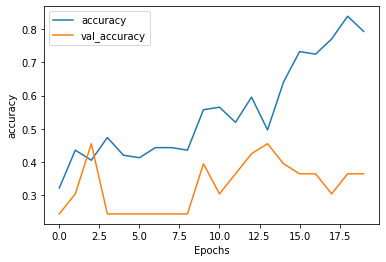

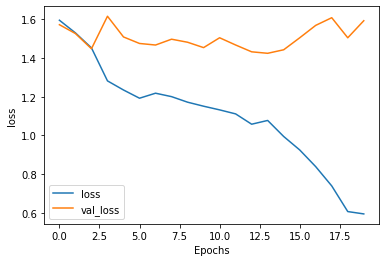

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The results of the LSTM performing supervised classification.

## Task 2: Figuring out how to classify Learners by Motivation

### Pre-Processing Data

In [26]:
df_reddit

,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,body,can_gild,can_mod_post,collapsed,collapsed_reason,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,no_follow,parent_id,permalink,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday,quarantined,locked,all_awardings,total_awards_received,steward_reports,awarders,associated_award,collapsed_because_crowd_control,author_premium
0,gloix,1.314202e+09,None,None,[],None,None,None,text,t2_5q1bq,False,You can say that when you've already ordered a...,True,False,False,None,0,1546300964,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczb5ii,False,t3_aaz2g9,True,t1_ecygmis,/r/Spanish/comments/aaz2g9/when_ordering_food_...,None,1550712660,1,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,garbagecoder,1.434302e+09,,second,"[{'e': 'text', 't': 'C1'}]",None,C1,dark,richtext,t2_o3ucv,False,Thank you. There are some language where the l...,True,False,False,None,0,1546301446,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczbpj8,True,t3_ab9dr8,True,t1_ecz24yd,/r/Spanish/comments/ab9dr8/data_on_spanish_for...,None,1550712907,2,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gatosol,1.477917e+09,#46d160,native,"[{'e': 'text', 't': '🇮🇨 Canarias (África) 🐱 Na...",ed67a04a-9a87-11e2-9ee1-12313b06caaf,🇮🇨 Canarias (África) 🐱 Native Spanish,light,richtext,t2_12hxof,False,Fast? \n\nhttp://www.youtube.com/watch?v=-W2NP...,True,False,False,None,0,1546301848,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczc6fx,False,t3_abcgjr,False,t3_abcgjr,/r/Spanish/comments/abcgjr/fast_speaking_youtu...,None,1550713115,3,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gloix,1.314202e+09,None,None,[],None,None,None,text,t2_5q1bq,False,"Chile? I have never heard someone say ""me pone...",True,False,False,None,0,1546301907,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczc8r2,False,t3_aaz2g9,True,t1_ecwk6pu,/r/Spanish/comments/aaz2g9/when_ordering_food_...,None,1550713145,1,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,brog88,1.499983e+09,None,None,[],None,None,None,text,t2_6z3h9m2,False,¡Feliz Año Nuevo! También he estado viendo las...,True,False,False,None,0,1546302339,None,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",eczcqr0,False,t3_abcugt,False,t3_abcugt,/r/Spanish/comments/abcugt/feliz_año_nuevo_201...,None,1550713397,9,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79886,Goatlessly,1.532500e+09,None,None,[],None,None,None,text,t2_1ulehyr1,False,Te lo resumo,True,False,False,None,0,1569887499,None,False,0,{},f22emdg,False,t3_dbff5h,True,t3_dbff5h,/r/learnspanish/comments/dbff5h/can_someone_re...,None,1578011733,2,True,False,learnspanish,t5_2rd6d,r/learnspanish,public,NaN,False,False,[],0.0,[],[],NaN,NaN,False
79887,stvbeev,1.513914e+09,None,None,[],None,None,None,text,t2_4iyofhk,False,"It’s usually presented as a dichotomy, but eac...",True,False,False,None,0,1569887598,None,False,0,{},f22es6l,False,t3_dbkdc0,True,t3_dbkdc0,/r/Spanish/comments/dbkdc0/what_are_some_diffe...,None,1578011813,7,True,False,Spanish,t5_2qtt1,r/Spanish,public,NaN,False,False,[],0.0,[],[],NaN,NaN,False
79888,Rumope,1.397216e+09,None,None,[],None,None,None,text,t2_g2tva,False,"Some sentences like ""A comer"" or ""A la playa"" ...",True,False,False,None,0,1569887809,None,False,0,{},f22f51w,False,t3_db5g7n,True,t1_f227n41,/r/Spanish/comments/db5g7n/

First, we will specify which columns to keep, dropping unimportant information to our task about background text and gildings. Then we are dropping posts that have a deleted author since we won't be able to connect it to other posts. We are also adding a column to reformat the timestamp when the post was created. We are then going to index by the author id to keep a hierarchy.

In [27]:
df_r = df_reddit[['author', 'author_fullname', 'author_flair_text', 'id', 'body', 'created_utc', 'is_submitter', 'link_id', 'no_follow', 'parent_id', 'permalink', 'score', 'subreddit', 'subreddit_id']]
df_r = df_r.dropna(axis=0, subset=['author_fullname', 'author'])

df_r = df_r.sort_values(['author_fullname'])
df_r = df_r.set_index(['author_fullname', 'id'])
df_r

author  ... subreddit_id
author_fullname id                      ...             
t2_100byr       evuk9t6  JOJOawestruck  ...     t5_2rd6d
                evug5dj  JOJOawestruck  ...     t5_2rd6d
t2_100irc       evzk75r  FinnTheFierce  ...     t5_2qtt1
                evzom0r  FinnTheFierce  ...     t5_2qtt1
                eunnx3y  FinnTheFierce  ...     t5_2qtt1
...                                ...  ...          ...
t2_zzree        eibf8z7       LangGeek  ...     t5_2qtt1
                evxgej4       LangGeek  ...     t5_2qtt1
                ek7ujxj       LangGeek  ...     t5_2qtt1
                euotx3g       LangGeek  ...     t5_2qtt1
                ejsn961       LangGeek  ...     t5_2qtt1

[73371 rows x 12 columns]

We are adding a timestamp to our posts so that we can have understanding of when the post was made.

In [28]:
from datetime import datetime, timezone

utcs = (df_r['created_utc'].astype(int))
ts = []
month = []
for u in utcs:
   t = datetime.fromtimestamp(u, tz=timezone.utc)
   ts.append(t)
   month.append(datetime.strftime(t, '%m'))

df_r['timestamp'] = ts
df_r['month'] = month

### Looking at Data

#### Summary Data

Now we are going to look at summary statistics for the data.

In [29]:
print("There are", df_r.author.nunique(), "users in the dataset.\n")

subreddit_user_count = list(df_r['subreddit'].value_counts())

print("There are", subreddit_user_count[0], "posts from the r/Spanish subreddit")
print("There are", subreddit_user_count[1], "posts from the r/learninspanish subreddit")

There are 12092 users in the dataset.

There are 52601 posts from the r/Spanish subreddit
There are 20770 posts from the r/learninspanish subreddit


In [30]:
# Most common author flairs
df_r['author_flair_text'].value_counts()[:10]

Native                                       3788
Learner                                      3032
Native (Spain)                               1316
Native Speaker                               1054
🇲🇽 (CDMX/GDL)                                 855
🇮🇨 Canarias (África) 🐱 Native Spanish         685
🇪🇸 España                                     596
🇮🇨 Canary Islands (Africa) Native Spanish     590
Native (Argentina)                            537
MA in Spanish                                 503
Name: author_flair_text, dtype: int64

In [31]:
# Average posts by a user
df_r.groupby(['author']).size().mean()

6.067730731061859

In [32]:
# Average length of a text post in characters
df_r['body'].str.len().mean()

219.2278420629404

#### Sample User Data

Here we can isolate a random user ('gatosol', 't2_12hxof) and try to get an idea of what information we get from their profile and posts.

In [33]:
user_sample = df_r.loc['t2_12hxof'].reset_index()
user_sample

,id,author,author_flair_text,body,created_utc,is_submitter,link_id,no_follow,parent_id,permalink,score,subreddit,subreddit_id,timestamp,month
0,egofj9a,gatosol,🇮🇨 Canarias (África) 🐱 Native Spanish,Yo aprendí a escribir en la época franquista a...,1550431196,False,t3_armosv,True,t1_egoemi0,/r/Spanish/comments/armosv/nos_vemos_or_nos_be...,0,Spanish,t5_2qtt1,2019-02-17 19:19:56+00:00,02
1,egonc38,gatosol,🇮🇨 Canarias (África) 🐱 Native Spanish,Pensé que eras inglés nativo. Una vez estuve d...,1550437409,False,t3_arkrih,True,t1_egoiqix,/r/learnspanish/comments/arkrih/what_does_balg...,1,learnspanish,t5_2rd6d,2019-02-17 21:03:29+00:00,02
2,evwz99y,gatosol,🇮🇨 Canary Islands (Africa),Electroencefalografista y esternocleidomastoid...,1564877446,False,t3_cloyva,True,t3_cloyva,/r/learnspanish/comments/cloyva/son_palabras_e...,2,learnspanish,t5_2rd6d,2019-08-04 00:10:46+00:00,08
3,eq9e6cb,gatosol,🇮🇨 Canary Islands (Africa) Native Spanish,¿Puedes escuchar eso sin ser un hablante nativ...,1559902462,False,t3_bxpez8,True,t3_bxpez8,/r/Spanish/comments/bxpez8/lo_que_escucho_en_l...,-1,Spanish,t5_2qtt1,2019-06-07 10:14:22+00:00,06
4,ei7wf2y,gatosol,🇮🇨 Canarias (África) 🐱 Native Spanish,&gt; ¡Disfrútate!\n\n¡Disfrúta***lo***!,1552239935,False,t3_azhwek,True,t3_azhwek,/r/Spanish/comments/azhwek/check_out_this_new_...,3,Spanish,t5_2qtt1,2019-03-10 17:45:35+00:00,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,eh45gbx,gatosol,🇮🇨 Canarias (África) 🐱 Native Spanish,Suena raro ¿Estás usando una expresión parecid...,1550944132,False,t3_atmvoo,True,t1_eh2jtlh,/r/Spanish/comments/atmvoo/spanish_practice_th...,1,Spanish,t5_2qtt1,2019-02-23 17:48:52+00:00,02
1505,eu8bli2,gatosol,🇮🇨 Canary Islands (Africa) Native Spanish,"As /u/xarkstick said, in the Canary Islands we...",1563553838,False,t3_cf8rf9,True,t1_eu8ajk9,/r/Spanish/comments/cf8rf9/allí_use_worldwide/...,3,Spanish,t5_2qtt1,2019-07-19 16:30:38+00:00,07
1506,evt3rrv,gatosol,🇮🇨 Canary Islands (Africa) Native Spanish,"Antioquia, Colombia. Cante al revés: \n\nhttp:...",1564762202,False,t3_ckxu5i,True,t1_evt0dhb,/r/Spanish/comments/ckxu5i/un_poco_de_humorcom...,2,Spanish,t5_2qtt1,2019-08-02 16:10:02+00:00,08
1507,ewipn3w,gatosol,🇮🇨 Canary Islands (Africa),"Ah, OK, gracias. Ahora sí se oye.",1565454233,False,t3_cojy1f,True,t1_ewipeve,/r/learnspanish/comments/cojy1f/subtitles_says...,1,learnspanish,t5_2rd6d,2019-08-10 16:23:53+00:00,08


We see that from the author_flair_text that they are a native speaker of Spanish, and therefore are not learning. We will eventually have to throw out this user, but we can do this with NLP processing by classifying a user as a learner or a native speaker.

Let's look at a user that we know is a learner, user LangGeek ('t2_zzree'). Their flair identifies them as a B2 learner which means that they are "vantage or upper intermediate" level.

In [34]:
user_sample = df_r.loc['t2_zzree'].reset_index()
user_sample

,id,author,author_flair_text,body,created_utc,is_submitter,link_id,no_follow,parent_id,permalink,score,subreddit,subreddit_id,timestamp,month
0,eldx1df,LangGeek,B2,por ti 🎵,1555802876,False,t3_bfi2vr,False,t1_eldvv5q,/r/Spanish/comments/bfi2vr/do_natives_actually...,4,Spanish,t5_2qtt1,2019-04-20 23:27:56+00:00,04
1,eldx5a0,LangGeek,B2,If it makes you feel any better I've been lear...,1555802957,False,t3_bfi2vr,False,t3_bfi2vr,/r/Spanish/comments/bfi2vr/do_natives_actually...,17,Spanish,t5_2qtt1,2019-04-20 23:29:17+00:00,04
2,ev8u2pw,LangGeek,B2,"Te gustó means ""did you like it?""\n\nTe gusto ...",1564291576,False,t3_cirsbe,True,t3_cirsbe,/r/Spanish/comments/cirsbe/does_te_gustó_have_...,13,Spanish,t5_2qtt1,2019-07-28 05:26:16+00:00,07
3,enrs1vo,LangGeek,B2,No more odd than a white person working at a C...,1558019409,False,t3_bpdlp7,False,t3_bpdlp7,/r/Spanish/comments/bpdlp7/does_a_white_kid_wo...,28,Spanish,t5_2qtt1,2019-05-16 15:10:09+00:00,05
4,eh9jiu9,LangGeek,B2,It's just Portuguese for bathroom /s,1551122613,False,t3_auntig,False,t3_auntig,/r/Spanish/comments/auntig/they_tried/eh9jiu9/,60,Spanish,t5_2qtt1,2019-02-25 19:23:33+00:00,02
5,evwmzs2,LangGeek,B2,Es cómico ver ese gran area blanco que es Bras...,1564868257,False,t3_cllsh9,False,t3_cllsh9,/r/Spanish/comments/cllsh9/el_mapa_de_países_h...,38,Spanish,t5_2qtt1,2019-08-03 21:37:37+00:00,08
6,eib1fdy,LangGeek,B2,El español en algunas partes del américa del s...,1552339473,False,t3_azuf1x,False,t1_eiacp3u,/r/Spanish/comments/azuf1x/cuál_es_tu_idioma_n...,9,Spanish,t5_2qtt1,2019-03-11 21:24:33+00:00,03
7,ej6foj6,LangGeek,B2,&gt;the Spanish speak rather fast and use voso...,1553321786,False,t3_b4d5mi,True,t1_ej6elpf,/r/Spanish/comments/b4d5mi/best_latin_american...,2,Spanish,t5_2qtt1,2019-03-23 06:16:26+00:00,03
8,ej6eemq,LangGeek,B2,"In terms of understandable accents, Peru is de...",1553320066,False,t3_b4d5mi,True,t1_ej6dbf0,/r/Spanish/comments/b4d5mi/best_latin_american...,5,Spanish,t5_2qtt1,2019-03-23 05:47:46+00:00,03
9,eibf8z7,LangGeek,B2,De acuerdo pero como estudiante del idioma que...,1552349607,False,t3_azuf1x,False,t1_eibeztj,/r/Spanish/comments/azuf1x/cuál_es_tu_idioma_n...,4,Spanish,t5_2qtt1,2019-03-12 00:13:27+00:00,03


Let's look at their post (id='eldx5a') to see what information they've shared about their learning.

In [35]:
for i in range(len(user_sample)):
  post = user_sample.iloc[i]
  print(post['id'], ": ", post['body'], "\n")

eldx1df :  por ti 🎵 

eldx5a0 :  If it makes you feel any better I've been learning for 7 years and I can only understand like 40-50% of what he says 

ev8u2pw :  Te gustó means "did you like it?"

Te gusto means "you like me"

I'm not completely sure of the context nor am I a flirting expert so i can't tell you if what they said is meant in that way, but since the ó has an accent it has to do with whatever they sent you before you complimented them. 

enrs1vo :  No more odd than a white person working at a Chinese restaurant 

eh9jiu9 :  It's just Portuguese for bathroom /s 

evwmzs2 :  Es cómico ver ese gran area blanco que es Brasil. Que tamaño. 

eib1fdy :  El español en algunas partes del américa del sur es tan diferente que lo de españa/méxico que sí pudieras llamarlo un idioma diferente. Especialmente lo de Argentina. Pero personalmente me gusta mucho más la forma "voseo" que usar simplemente "tú". 

ej6foj6 :  &gt;the Spanish speak rather fast and use vosotros which could be an

We see that they've been learning for 7 years ('eldx5a0'), that they "speak like an Argentinian" but have a hard time understanding other Argentinians ('eibf8z7'), and that they talk to themselves in their head to faciliate learning ('euotx3g'). These comments also highlight differences in learning Spanish that is spoken in different countries.

There's not much about user 't2_zzree's personal motivation in this post though there is an implication of learning for someone that the user is interested in communicating with.

#### Extracting out Learners

In [36]:
df_r.fillna("",inplace=True)

df_r['author_flair_text'] = df_r['author_flair_text'].str.lower()

We are performing regex pattern matching to find a subset of users that are blatantly identified as learners.

In [37]:
patterns = [r"learner", r"heritage", r"native",r"[a-z]{1}[0-2]{1}", r"student", r"beginner", r"intermediate", r"advanced"]

flair_patterns = '|'.join(patterns)
df_r['learner'] =  df_r['author_flair_text'].str.contains(flair_patterns)
df_r

author author_flair_text  ... month  learner
author_fullname id                                        ...               
t2_100byr       evuk9t6  JOJOawestruck                    ...    08    False
                evug5dj  JOJOawestruck                    ...    08    False
t2_100irc       evzk75r  FinnTheFierce                    ...    08    False
                evzom0r  FinnTheFierce                    ...    08    False
                eunnx3y  FinnTheFierce                    ...    07    False
...                                ...               ...  ...   ...      ...
t2_zzree        eibf8z7       LangGeek                b2  ...    03     True
                evxgej4       LangGeek                b2  ...    08     True
                ek7ujxj       LangGeek                b2  ...    04     True
                euotx3g       LangGeek                b2  ...    07     True
                ejsn961       LangGeek                b2  ...    03     True

[73371 rows x 15 columns]

In [38]:
df_learner = df_r.loc[df_r['learner']]
df_learner = df_learner.drop(columns=['learner'])
df_learner.set_index('author')

,author_flair_text,body,created_utc,is_submitter,link_id,no_follow,parent_id,permalink,score,subreddit,subreddit_id,timestamp,month
author,,,,,,,,,,,,,
Pengliz,intermediate,¡Muchas gracias!,1549324266,False,t3_an2c9o,True,t3_an2c9o,/r/learnspanish/comments/an2c9o/live_spanish_m...,2,learnspanish,t5_2rd6d,2019-02-04 23:51:06+00:00,02
Pengliz,learner,Thanks for your help! That's perfect. \nSorry...,1554268295,True,t3_b8mdc1,True,t1_ek00b96,/r/Spanish/comments/b8mdc1/el_vocabulario_de_l...,1,Spanish,t5_2qtt1,2019-04-03 05:11:35+00:00,04
Pengliz,learner,"Oh, I see what you mean. Thanks for your help...",1554295463,True,t3_b8mdc1,True,t1_ek0mlld,/r/Spanish/comments/b8mdc1/el_vocabulario_de_l...,1,Spanish,t5_2qtt1,2019-04-03 12:44:23+00:00,04
zephyr121,learner 🇺🇸,I have some background in both Spanish and Fre...,1569609445,False,t3_d9wv8a,True,t3_d9wv8a,/r/Spanish/comments/d9wv8a/can_nonnative_spani...,1,Spanish,t5_2qtt1,2019-09-27 18:37:25+00:00,09
LesterBurnham3409,learner,"I've heard ""Como estamos?"" to mean how are we ...",1547936340,False,t3_ahq8vs,True,t3_ahq8vs,/r/Spanish/comments/ahq8vs/como_vamos/eeh502q/,5,Spanish,t5_2qtt1,2019-01-19 22:19:00+00:00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LangGeek,b2,De acuerdo pero como estudiante del idioma que...,1552349607,False,t3_azuf1x,False,t1_eibeztj,/r/Spanish/comments/azuf1x/cuál_es_tu_idioma_n...,4,Spanish,t5_2qtt1,2019-03-12 00:13:27+00:00,03
LangGeek,b2,A popular thing to say in american spanish (an...,1564891603,False,t3_clr9tt,True,t3_clr9tt,/r/Spanish/comments/clr9tt/how_to_say_fuck_him...,2,Spanish,t5_2qtt1,2019-08-04 04:06:43+00:00,08
LangGeek,b2,"Para distinguir los sonidos ""gui"" y ""güi"". Con...",1554510972,False,t3_b9ybp0,False,t3_b9ybp0,/r/Spanish/comments/b9ybp0/diéresis/ek7ujxj/,7,Spanish,t5_2qtt1,2019-04-06 00:36:12+00:00,04


In [39]:
out = open('reddit_learners.csv', 'w')
df_learner.to_csv(out)

#### Manually annotating posts with motivation

1. Go through posts and classify them as hasMotivation (true, false) based on having the above regex words.
2. Then from posts that do have motivation, combine to be one document for a user.
3. Transform the posts to vectors using word2vec
4. perform K-means clustering on the users' posts in vector space
5. Use Elbow criterion to find best clusters

We are now importing a CSV that was manually annotated to assign each post to a motivation profile. The meanings of the labels are as follows:



0.   No mention of motivation
1.   Culture
2.   Dating & Family
3.   School & Lessons
4.   Career
5.   Travel
6.   Heritage

In [40]:
df_reddit_tagged = pd.read_csv('reddit_tagged.csv')

In [41]:
print(df_learner.shape)
print(df_reddit_tagged.shape)

(22518, 14)
(1196, 15)


We are using about 5% of posts from learners that have annotations. This could potentially be used for semi-supervised learning if our model fits to supervised learning well.

In [42]:
df_tagged = df_reddit_tagged[['author','author_flair_text','body','created_utc','class']]
df_tagged = df_tagged.dropna()
df_tagged['class'] = df_tagged['class'].astype(int)
df_tagged

,author,author_flair_text,body,created_utc,class
0,Pengliz,learner,"Oh, I see what you mean. Thanks for your help...",1554295463,5
1,thetripodguy,learner,"Well, some people may disagree with me, but I ...",1549223827,0
2,thetripodguy,learner,Sin Senos Sí Hay Paraíso\n\nIt's divisive amon...,1548257963,0
3,oldskoolgeometro,learner (a1),"Yes. Of my non-native speaking friends, I know...",1549291709,1
4,oldskoolgeometro,beginner,"Oh, I forgot to look! If you're American, look...",1553516324,0
...,...,...,...,...,...
794,ASunCame,a2,"A related one is ""de ahi"" which basically mean...",1557023712,0
795,ASunCame,a2,Every native speaker I've heard use the word h...,1558292114,0
796,ASunCame,a2,I agree with the others that are saying Duolin...,1561822733,0
797,ASunCame,a2,"That's a good point. With 'estudiar espanol', ...",1558763156,0


In [43]:
# Most common author flairs
df_tagged['author_flair_text'].value_counts()[:10]

learner                                                282
estadounidense entre b2 y c1                            27
spanish ma student                                      27
learner                                                 24
🇦🇺🇲🇽 guadalajara; c1; spanish teacher; grammar geek     20
beginner                                                18
heritage                                                16
a2                                                      14
l2 - c1+ (chl)                                          13
c0                                                      12
Name: author_flair_text, dtype: int64

In [44]:
user_sample = df_tagged.loc[df_tagged['author'] == 'oldskoolgeometro']
user_sample

,author,author_flair_text,body,created_utc,class
3,oldskoolgeometro,learner (a1),"Yes. Of my non-native speaking friends, I know...",1549291709,1
4,oldskoolgeometro,beginner,"Oh, I forgot to look! If you're American, look...",1553516324,0
5,oldskoolgeometro,learner (a1),Are you a native Spanish speaker? Some days Sp...,1549587720,0
6,oldskoolgeometro,beginner,"It has actually. I have ""met"" 5 people that I ...",1551216319,0
7,oldskoolgeometro,learner (a1),"OMG, yes! For me, just when I think I have it,...",1547050508,1
8,oldskoolgeometro,beginner,"I believe it has at least 2 meanings. One is ""...",1546975959,0
9,oldskoolgeometro,learner (a1),"Lol, my friend used to always say ""cochina"" wh...",1546547732,0
10,oldskoolgeometro,beginner,My paws make it a bit tricky since I have no t...,1556248696,0
11,oldskoolgeometro,beginner,Thanks a bunch. I'll look in the Google store ...,1551470813,0
12,oldskoolgeometro,beginner,This is what I've seen from my native Spanish ...,1546652030,2


Here we look at user 'oldskoolgeometro' who has identified themselves as a "beginner" and "learner (a1)".

Most of their posts are tagged 0 for no motivation, but the below post is labeled for class 5: "travel".

In [45]:
print(user_sample.loc[16]['body'])
print(user_sample.loc[16]['class'])

I'm mostly listening to Celia Cruz. Admittedly I don't know much by her (which is why I'm listening to her now). I booked a trip to Cuba because Gutanamera was stuck in my head for 3 days. 

You get to hear the Cuban dialect with her. 
5


We will drop all posts that are labeled 0 for having no motivation. We are then going to subtract 1 from all labels to start our classes at 0.

In [46]:
df_motiv = df_tagged.where(df_tagged['class'] > 0, None)
df_motiv = df_motiv.dropna()

In [47]:
df_motiv['class'] = df_motiv['class'] - 1
df_motiv

,author,author_flair_text,body,created_utc,class
0,Pengliz,learner,"Oh, I see what you mean. Thanks for your help...",1554295463,4
3,oldskoolgeometro,learner (a1),"Yes. Of my non-native speaking friends, I know...",1549291709,0
7,oldskoolgeometro,learner (a1),"OMG, yes! For me, just when I think I have it,...",1547050508,0
12,oldskoolgeometro,beginner,This is what I've seen from my native Spanish ...,1546652030,1
13,oldskoolgeometro,beginner,"Oddly enough, I took Spanish online when I was...",1546561267,3
...,...,...,...,...,...
764,Woodcharles,learner,And I think you're wrong. They will be perfect...,1556182920,4
779,maxwellhouseeyes,c1,"Yeah, I thought the same (about your first poi...",1564045715,4
784,Omphalie23,learner,This happened to me when I started taking Span...,1569087747,2
785,Flashpath,learner,"My ex was from Colombia, went there and made a...",1557321403,1


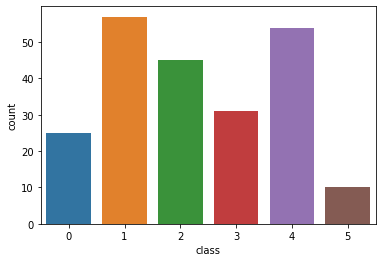

In [48]:
import seaborn as sns

sns.countplot(x='class', data=df_motiv)

Here we have classes represented.

0.   Culture
1.   Dating & Family
2.   School & Lessons
3.   Career
4.   Travel
5.   Heritage

### Initial Analysis

First we are going to clean up the text data.

In [49]:
df = df_motiv

In [50]:
texts=[]
for text in df['body']:
  text = re.sub(r"[{}]".format(string.punctuation), " ", text.lower())
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
  text = re.sub(r'\s+', ' ', text, flags=re.I)
  texts.append(text)

df['body'] = texts
df

,author,author_flair_text,body,created_utc,class
0,Pengliz,learner,oh see what you mean thanks for your help it w...,1554295463,4
3,oldskoolgeometro,learner (a1),yes of my non native speaking friends know mor...,1549291709,0
7,oldskoolgeometro,learner (a1),omg yes for me just when think have it realize...,1547050508,0
12,oldskoolgeometro,beginner,this is what ve seen from my native spanish sp...,1546652030,1
13,oldskoolgeometro,beginner,oddly enough took spanish online when was depl...,1546561267,3
...,...,...,...,...,...
764,Woodcharles,learner,and think you re wrong they will be perfectly ...,1556182920,4
779,maxwellhouseeyes,c1,yeah thought the same about your first point h...,1564045715,4
784,Omphalie23,learner,this happened to me when started taking spanis...,1569087747,2
785,Flashpath,learner,my ex was from colombia went there and made fe...,1557321403,1


In [51]:
labels = np.asarray(df['class']).astype(int)
labels[:5]

array([4, 0, 0, 1, 3])

#### Vectorizing with Tf-Idf

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.8, stop_words=['english','spanish'], use_idf=True)
tfidf = tfidfvect.fit_transform(df['body'])

print(tfidf.shape)

(222, 535)


We have 222 samples that have 535 features.

In [53]:
print(df.loc[0]['body'])
x = pd.DataFrame(tfidf[0].T.todense(), index = tfidfvect.get_feature_names_out(), columns = ['tfidf'])
x = x.sort_values(by = ['tfidf'], ascending=False)
print(x[:5])
print("\nLabel: ", labels[0])

oh see what you mean thanks for your help it was very useful ll test it out in shop next week
           tfidf
thanks  0.349562
week    0.327773
useful  0.318853
oh      0.310873
mean    0.297064

Label:  4


#### Scatterplot Using Actual Labels

In [54]:
from sklearn.decomposition import PCA

In [55]:
# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=len(labels))
two_dim = pca.fit_transform(tfidf.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


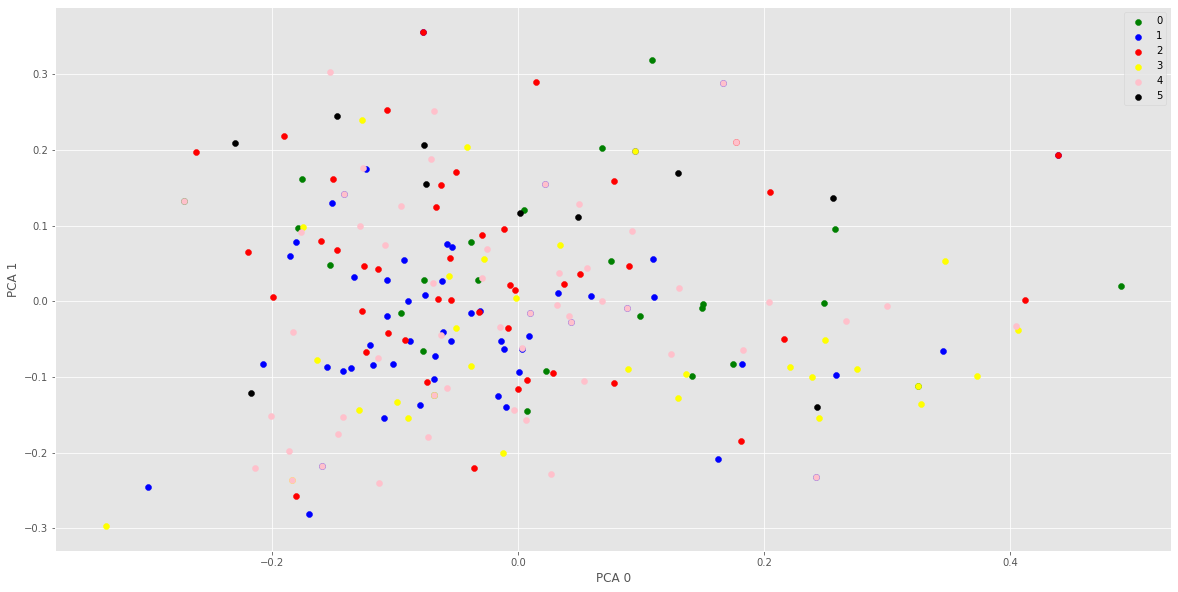

In [56]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow', 4: "pink", 5:"black"}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(labels):
    ix = np.where(labels == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

#### K-Means Clustering & PCA

In [57]:
from sklearn.cluster import KMeans

In [58]:
num=6

kmeans = KMeans(n_clusters = num, init='k-means++', max_iter = 15).fit(tfidf)
print(kmeans.cluster_centers_)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01640008 0.         ... 0.         0.         0.        ]
 [0.00116494 0.00201178 0.01054457 ... 0.06481803 0.01315261 0.00551575]
 [0.         0.02577819 0.03885033 ... 0.01393601 0.         0.        ]
 [0.00949215 0.00369824 0.00737003 ... 0.00248646 0.         0.00845594]
 [0.0123614  0.         0.01416559 ... 0.03428678 0.         0.        ]]


In [59]:
predicting = [df.iloc[0]['body'], df.iloc[1]['body'], df.iloc[2]['body'], df.iloc[3]['body']]
print("author ", df.iloc[0]['author'], ": ", df.iloc[0]['body'])
print("author ", df.iloc[1]['author'], ": ", df.iloc[1]['body'])
print("author ", df.iloc[2]['author'], ": ", df.iloc[2]['body'])
print("author ", df.iloc[3]['author'], ": ", df.iloc[3]['body'])
pred = kmeans.predict(tfidfvect.transform(predicting))
actual = [labels[0], labels[1], labels[2], labels[3]]

print("\nPredicted Labels by K-Means: ", pred)
print("\nActual Labels: ", actual)

author  Pengliz :  oh see what you mean thanks for your help it was very useful ll test it out in shop next week
author  oldskoolgeometro :  yes of my non native speaking friends know more spanish than them but m also the only one who has actively tried to learn it nobody in my circle has taken up second language so it makes sense that would know more than them like was telling my friend last night my vocabulary is so random lol some of the words that know have no idea where or how learned it like pene like what on earth is that word even in my vocabulary 
author  oldskoolgeometro :  omg yes for me just when think have it realize don not sure if you re familiar with amara la negra but follow her on instagram yesterday she posted something to the effect of me toca bailar m sitting there staring at my phone like wtf touch to dance had to ask my friend what it meant and he explained it means my turn to dance spanish is so difficult for me some things get very easily and others hacer haber

K-Means is not trying to predict labels, just clustering, but it did not cluster the same labels that the annotators had.

In [60]:
# First: for every document we get its corresponding cluster
clusters = kmeans.predict(tfidf)

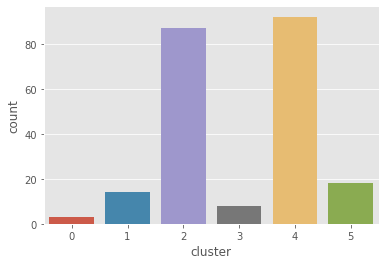

In [61]:
preds = pd.DataFrame(clusters, columns=['cluster'])
sns.countplot(x='cluster', data=preds)

In [62]:
# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=num)
two_dim = pca.fit_transform(tfidf.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [63]:
print(pca.explained_variance_)

[0.02491845 0.01782109 0.01667774 0.01607882 0.01421241 0.01377605]


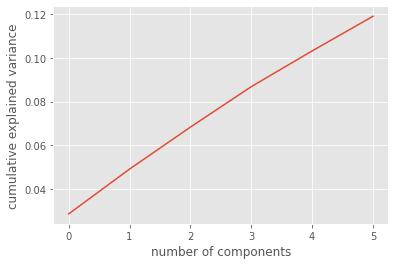

In [64]:
# plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

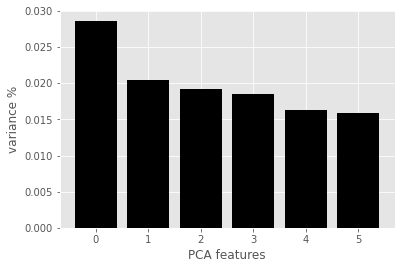

In [65]:
# Plot the explained variances
features = range(num)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

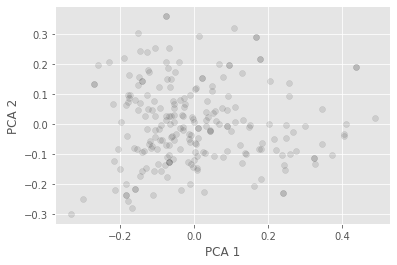

In [66]:
#Visualize the first two components
PCA_components = pd.DataFrame(two_dim)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

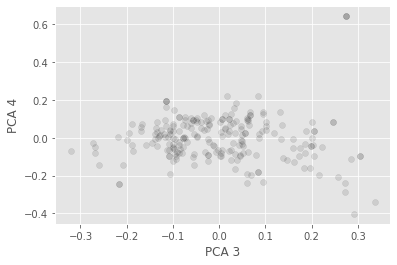

In [67]:
#Visualize the 3rd and 4th components
#this seems to have some sort of 2 dense areas
PCA_components = pd.DataFrame(two_dim)
plt.scatter(PCA_components[2], PCA_components[3], alpha=.1, color='black')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')
plt.show()

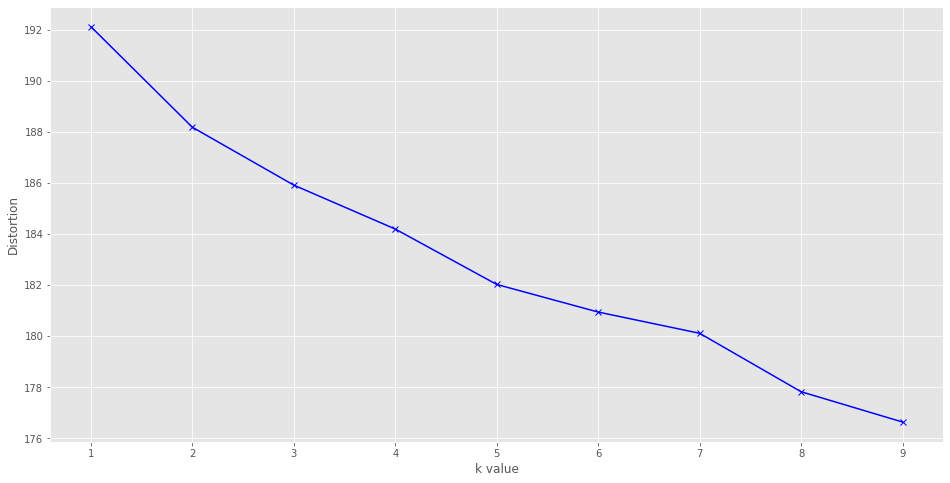

In [68]:
distortions = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(tfidf)
    distortions.append(model.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.ylabel('Distortion')
plt.xlabel('k value')
plt.show()

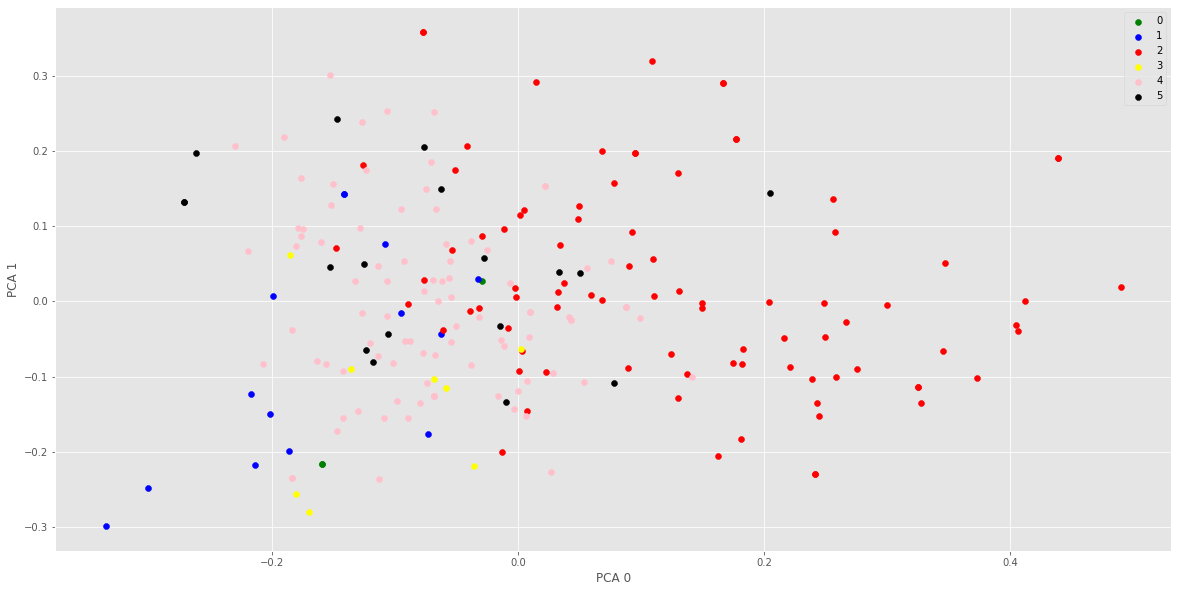

In [69]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow', 4: "pink", 5:"black"}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

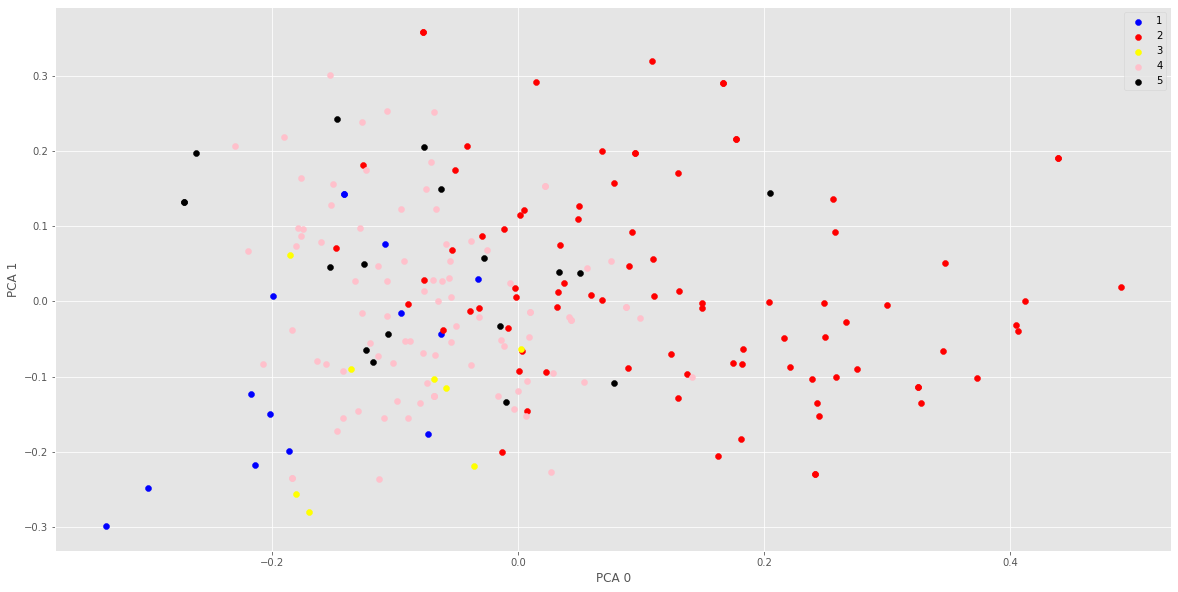

In [70]:
#plot without group 0
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow', 4: "pink", 5:"black"}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in range(1,6):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

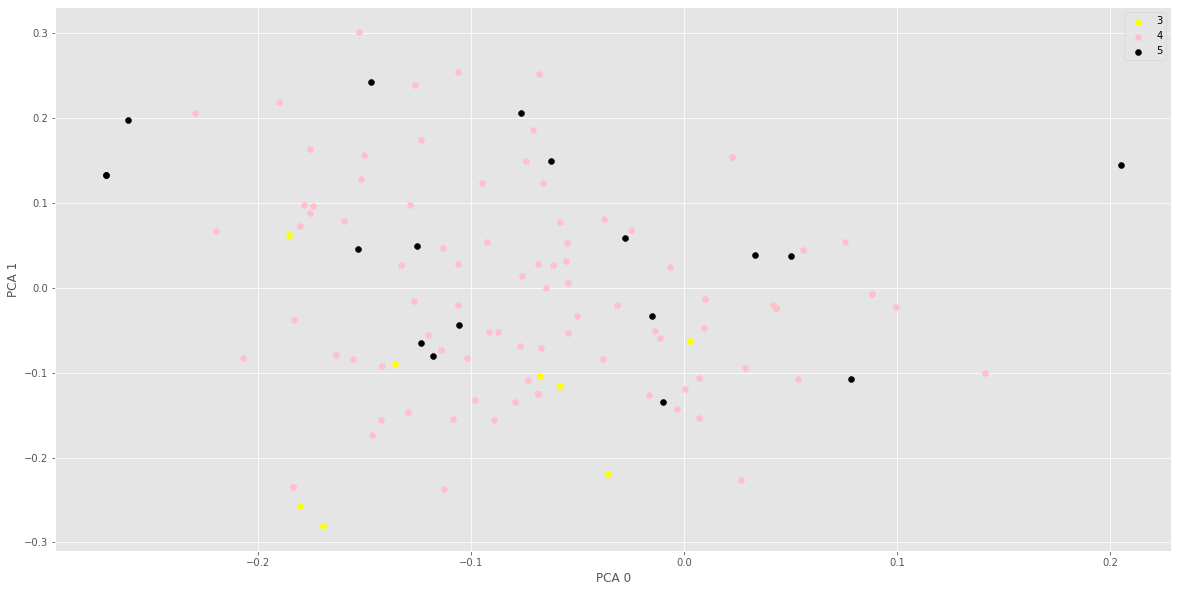

In [71]:
# can see a more clear split between certain groups like 
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow', 4: "pink", 5:"black"}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in [3,4,5]:
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

### Modeling

We are going to begin with a Bag-of-Words approach to predict motivation labels for each post. We will investigate Naive Bayes and Logistic Regression as models. Then we will train a sequential model.

In [72]:
print(tfidf.shape)
print(labels.shape)

(222, 535)
(222,)


In [73]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
# from sklearn.metrics import roc_curve, auc, roc_auc_score

#### Naive Bayes

In [74]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, shuffle=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.27      0.29      0.28        14
           2       0.50      0.09      0.15        11
           3       1.00      0.14      0.25         7
           4       0.21      0.62      0.31         8
           5       0.00      0.00      0.00         2

    accuracy                           0.24        45
   macro avg       0.33      0.19      0.17        45
weighted avg       0.40      0.24      0.22        45

Confusion Matrix:
 [[ 0  1  0  0  2  0]
 [ 0  4  0  0 10  0]
 [ 0  5  1  0  5  0]
 [ 2  2  0  1  2  0]
 [ 1  2  0  0  5  0]
 [ 0  1  1  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Text(91.68, 0.5, 'true label')

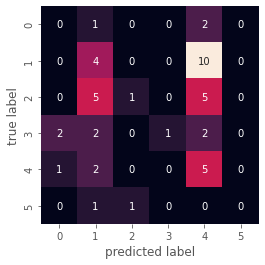

In [75]:
#Naive Bayes: Baseline Model with no smoothing

nb_tfidf = MultinomialNB(alpha = 0)
nb_tfidf.fit(X_train, y_train)
y_predict = nb_tfidf.predict(X_test)
y_prob = nb_tfidf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_predict))
mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', mat)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.36      0.36      0.36        14
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         7
           4       0.20      0.75      0.32         8
           5       0.00      0.00      0.00         2

    accuracy                           0.27        45
   macro avg       0.26      0.20      0.14        45
weighted avg       0.39      0.27      0.21        45

Confusion Matrix:
 [[0 2 0 0 1 0]
 [0 5 0 0 9 0]
 [0 3 1 0 7 0]
 [0 2 0 0 5 0]
 [0 2 0 0 6 0]
 [0 0 0 0 2 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'true label')

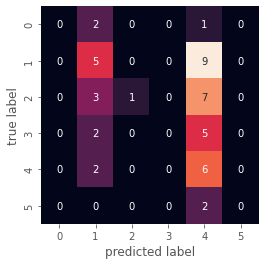

In [76]:
#hyperparameter tuning
#Naive Bayes: with add-1 smoothing

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_predict = nb_tfidf.predict(X_test)
y_prob = nb_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', mat)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.50      0.68      0.58        19
           2       0.30      0.60      0.40        10
           3       0.00      0.00      0.00         7
           4       0.38      0.44      0.41        18
           5       0.00      0.00      0.00         3

    accuracy                           0.40        67
   macro avg       0.20      0.29      0.23        67
weighted avg       0.29      0.40      0.33        67

Confusion Matrix:
 [[ 0  4  2  0  4  0]
 [ 0 13  3  0  3  0]
 [ 0  2  6  0  2  0]
 [ 0  3  1  0  3  0]
 [ 0  4  6  0  8  0]
 [ 0  0  2  0  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'true label')

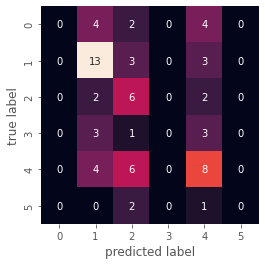

In [77]:
#Naive Bayes: with add-1 smoothing
#try a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.3, shuffle=True)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_predict = nb_tfidf.predict(X_test)
y_prob = nb_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', mat)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

#### Logistic Regression

In [78]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, shuffle=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.42      0.67      0.52        12
           2       0.45      0.56      0.50         9
           3       0.67      0.25      0.36         8
           4       0.33      0.50      0.40         8
           5       0.00      0.00      0.00         2

    accuracy                           0.42        45
   macro avg       0.31      0.33      0.30        45
weighted avg       0.38      0.42      0.37        45

Confusion Matrix:
 [[0 2 1 1 2 0]
 [0 8 2 0 2 0]
 [0 3 5 0 1 0]
 [0 3 0 2 3 0]
 [0 3 1 0 4 0]
 [0 0 2 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'true label')

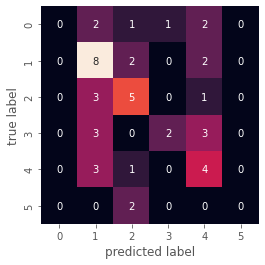

In [79]:
lg_tfidf = LogisticRegression()
lg_tfidf.fit(X_train, y_train)
y_predict = lg_tfidf.predict(X_test)
y_prob = lg_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', mat)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.42      0.67      0.52        12
           2       0.50      0.44      0.47         9
           3       0.50      0.12      0.20         8
           4       0.31      0.62      0.42         8
           5       0.00      0.00      0.00         2

    accuracy                           0.40        45
   macro avg       0.29      0.31      0.27        45
weighted avg       0.36      0.40      0.34        45

Confusion Matrix:
 [[0 2 1 1 2 0]
 [0 8 2 0 2 0]
 [0 3 4 0 2 0]
 [0 3 0 1 4 0]
 [0 3 0 0 5 0]
 [0 0 1 0 1 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'true label')

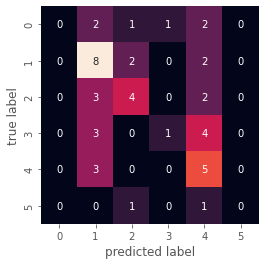

In [80]:
lg2_tfidf = LogisticRegression(solver = 'liblinear', random_state = 20, penalty = 'l2')

lg2_tfidf.fit(X_train, y_train)
y_predict2 = lg2_tfidf.predict(X_test)
y_prob2 = lg2_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict2))
mat = confusion_matrix(y_test, y_predict2)
print('Confusion Matrix:\n', mat)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

#### LSTM

In [81]:
# hyperparameters
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [82]:
labels = labels.astype(int)
docs = []
for doc in df['body']:
  for word in STOPWORDS:
    token = ' ' + word + ' '
    doc = doc.replace(token, ' ')
    doc = doc.replace(' ', ' ')
  docs.append(doc)
print(len(labels))
print(len(docs))

222
222


In [83]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [84]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(docs)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'also': 15,
 'english': 6,
 'even': 19,
 'i': 5,
 'know': 14,
 'language': 4,
 'learn': 7,
 'like': 3,
 'one': 11,
 'people': 10,
 'really': 17,
 'school': 20,
 'spanish': 2,
 'speak': 13,
 'speaking': 8,
 'time': 16,
 'use': 12,
 'would': 9,
 'years': 18}

In [85]:
sequences = tokenizer.texts_to_sequences(docs)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [86]:
label_seq = np.array(labels)

Creating the model with an embedding layer, a bidirectional layer, a droupout layer to avoid overfitting, and a softmax layer.

In [87]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 386,822
Trainable params: 386,822
Non-trainable params: 0
_________________________________________________________________


We didn't do one-hot encoding, so used categorical crossentropy for loss. Important to note that these labels are not ordered and do not have any numeric relationship.

In [88]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded, label_seq, epochs=10, validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 6s 380ms/step - loss: 1.7862 - accuracy: 0.2260 - val_loss: 1.7683 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 1s 214ms/step - loss: 1.7459 - accuracy: 0.2599 - val_loss: 1.7290 - val_accuracy: 0.1556
Epoch 3/10
6/6 [==============================] - 1s 211ms/step - loss: 1.6911 - accuracy: 0.2712 - val_loss: 1.7183 - val_accuracy: 0.1111
Epoch 4/10
6/6 [==============================] - 1s 215ms/step - loss: 1.6597 - accuracy: 0.2825 - val_loss: 1.6755 - val_accuracy: 0.1111
Epoch 5/10
6/6 [==============================] - 1s 214ms/step - loss: 1.6389 - accuracy: 0.3277 - val_loss: 1.6699 - val_accuracy: 0.1333
Epoch 6/10
6/6 [==============================] - 1s 213ms/step - loss: 1.5982 - accuracy: 0.3390 - val_loss: 1.6617 - val_accuracy: 0.1111
Epoch 7/10
6/6 [==============================] - 1s 215ms/step - loss: 1.5654 - accuracy: 0.2994 - val_loss: 1.6633 - val_accuracy: 0.1111
Epoch 8/10
6/6 [====

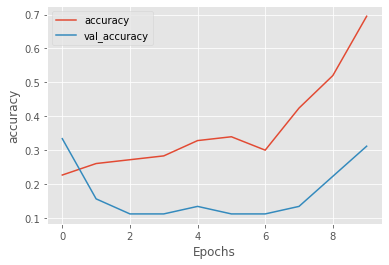

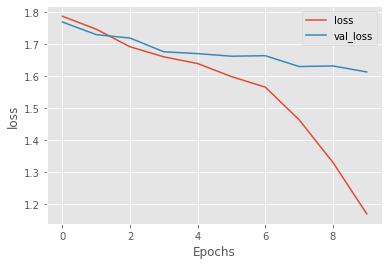

In [89]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Time Sequential Analysis

In [90]:
from datetime import datetime, timezone

utcs = (df['created_utc'].astype(int))
ts = []
month = []
for u in utcs:
   t = datetime.fromtimestamp(u, tz=timezone.utc)
   ts.append(t)
   month.append(datetime.strftime(t, '%m'))

df['timestamp'] = ts
df['month'] = month
df

,author,author_flair_text,body,created_utc,class,timestamp,month
0,Pengliz,learner,oh see what you mean thanks for your help it w...,1554295463,4,2019-04-03 12:44:23+00:00,04
3,oldskoolgeometro,learner (a1),yes of my non native speaking friends know mor...,1549291709,0,2019-02-04 14:48:29+00:00,02
7,oldskoolgeometro,learner (a1),omg yes for me just when think have it realize...,1547050508,0,2019-01-09 16:15:08+00:00,01
12,oldskoolgeometro,beginner,this is what ve seen from my native spanish sp...,1546652030,1,2019-01-05 01:33:50+00:00,01
13,oldskoolgeometro,beginner,oddly enough took spanish online when was depl...,1546561267,3,2019-01-04 00:21:07+00:00,01
...,...,...,...,...,...,...,...
764,Woodcharles,learner,and think you re wrong they will be perfectly ...,1556182920,4,2019-04-25 09:02:00+00:00,04
779,maxwellhouseeyes,c1,yeah thought the same about your first point h...,1564045715,4,2019-07-25 09:08:35+00:00,07
784,Omphalie23,learner,this happened to me when started taking spanis...,1569087747,2,2019-09-21 17:42:27+00:00,09
785,Flashpath,learner,my ex was from colombia went there and made fe...,1557321403,1,2019-05-08 13:16:43+00:00,05


In [91]:
df.sort_values('month')
df['month'] = df['month'].astype(int)

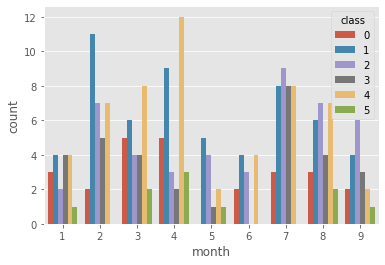

In [92]:
sns.countplot(x='month', hue='class', data=df)